In [157]:
import os
import json
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import numpy as np
import random

In [158]:
with open(os.path.join("data", "final_data.json"), "r") as f:
    data = json.loads(f.read())

In [159]:
comments_rtvslo = []
comments_24ur = []
for idx, article in enumerate(data):
    if "total_comments" in article["24ur"].keys() and article["24ur"]["total_comments"] != -1:
        if article["24ur"]["similarity_score"] > 0.4:
            comments_rtvslo.append(article["total_comments"])
            comments_24ur.append(article["24ur"]["total_comments"])
            if abs(article["total_comments"] - article["24ur"]["total_comments"]) > 1000:
            # if article["24ur"]["total_comments"] > 60:
                print(article["url"])
                print(article["24ur"]["url"])
                print()

https://www.rtvslo.si/svet/bliznji-vzhod/nov-raketni-napad-v-blizini-ameriskega-veleposlanistva-v-bagdadu/510788
https://www.24ur.com/novice/tujina/raketni-napad-na-zeleno-cono-v-bagdadu.html

https://www.rtvslo.si/svet/bliznji-vzhod/iran-napovedal-mascevanje-zda-na-bliznji-vzhod-posiljajo-dodatnih-3-000-vojakov/510647
https://www.24ur.com/novice/tujina/zda-v-irak-posiljajo-dodatnih-750-vojakov.html

https://www.rtvslo.si/svet/evropa/putin-podpisal-odlok-o-priznanju-separatisticnih-republik-v-ukrajini-vanju-posilja-mirovne-sile/613159
https://www.24ur.com/novice/tujina/biden-se-je-pripravljen-srecati-s-putinom-a-le-ce-rusija-ne-napade-ukrajine.html

https://www.rtvslo.si/sport/oi-2022/sporti/smucarski-skoki/orli-v-vetrni-loteriji-poleteli-do-olimpijskega-srebra/612278
https://www.24ur.com/sport/olimpijske-igre/smucarski-skoki.html

https://www.rtvslo.si/svet/s-in-j-amerika/kongres-nekaj-ur-po-nasilnem-vdoru-trumpovih-privrzencev-potrdil-zmago-bidna/548011
https://www.24ur.com/novice/tu

In [160]:
len(comments_rtvslo)

1492

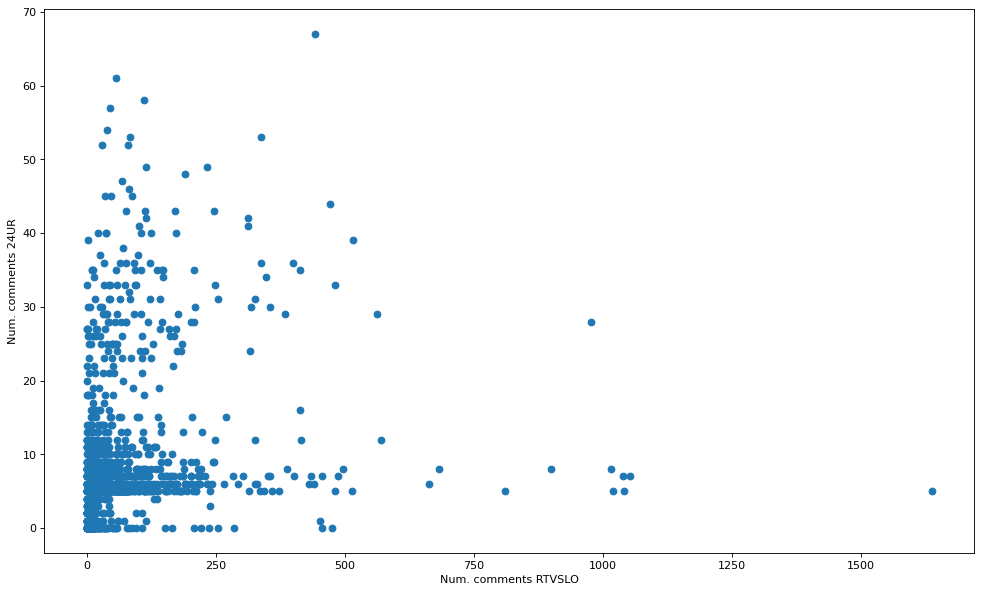

In [165]:
plt.figure(figsize=(15, 9), dpi=80, facecolor='white')
plt.plot(comments_rtvslo, comments_24ur, "o", label='articles')
plt.xlabel("Num. comments RTVSLO")
plt.ylabel("Num. comments 24UR")
# plt.plot(comments_rtvslo, "o", label='articles')
# plt.plot(comments_24ur, "o", label='articles')
# plt.xlim(-5,75)

# plt.hist(comments_24ur, bins=100)


# plt.xscale('log')
plt.savefig("../img/correlation.png", bbox_inches='tight')
plt.show()

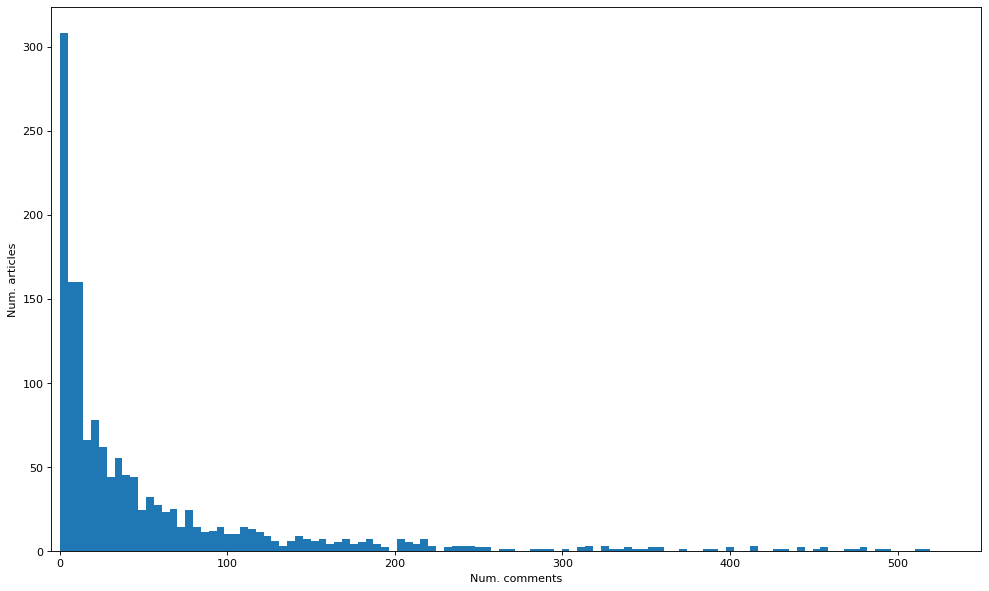

In [171]:
plt.figure(figsize=(15, 9), dpi=80, facecolor='white')
plt.hist(comments_rtvslo, bins=350)
plt.xlabel("Num. comments")
plt.ylabel("Num. articles")
plt.xlim(-5,550)

plt.savefig("../img/histogram_rtvslo.png", bbox_inches='tight')
plt.show()

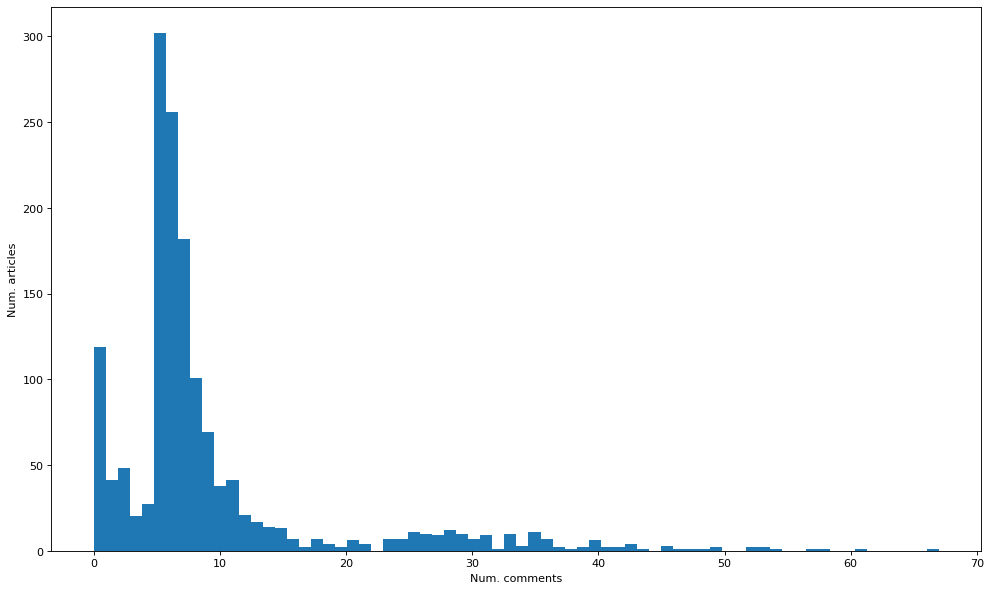

In [174]:
plt.figure(figsize=(15, 9), dpi=80, facecolor='white')
plt.hist(comments_24ur, bins=70)
plt.xlabel("Num. comments")
plt.ylabel("Num. articles")

plt.savefig("../img/histogram_24ur.png", bbox_inches='tight')
plt.show()

In [140]:
category_data = defaultdict(list)
for idx, article in enumerate(data):
    category_data[article["category"]].append(article["total_comments"])

In [141]:
filtered_categories = []
category_names = []
filtered_categories_avg = []
filtered_categories_std = []
count = 0
for category in category_data:
    if len(category_data[category]) > 10:
        filtered_categories.append(category_data[category])
        filtered_categories_avg.append(sum(category_data[category]) / len(category_data[category]))
        std = 0
        for i in range(10):
            std += np.std(random.choices(category_data[category], k=10)) / 10
        filtered_categories_std.append(std)
        category_names.append(category)
        count += len(category_data[category])

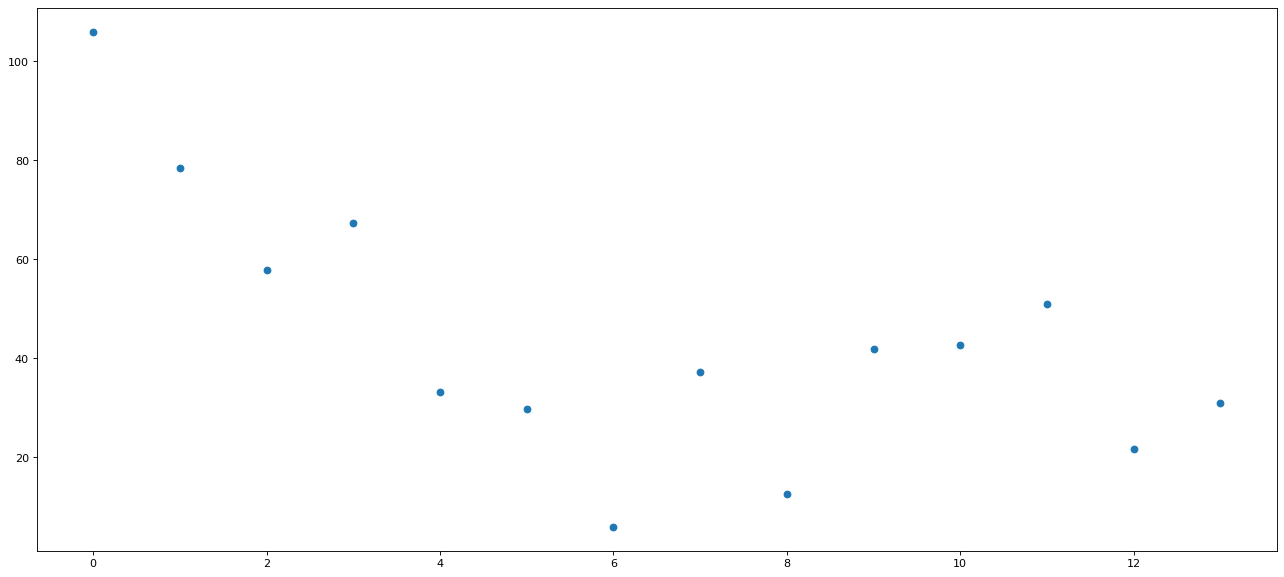

In [142]:
plt.figure(figsize=(20, 9), dpi=80, facecolor='white')
plt.plot(filtered_categories_avg, "o", label="ssss")
plt.show()

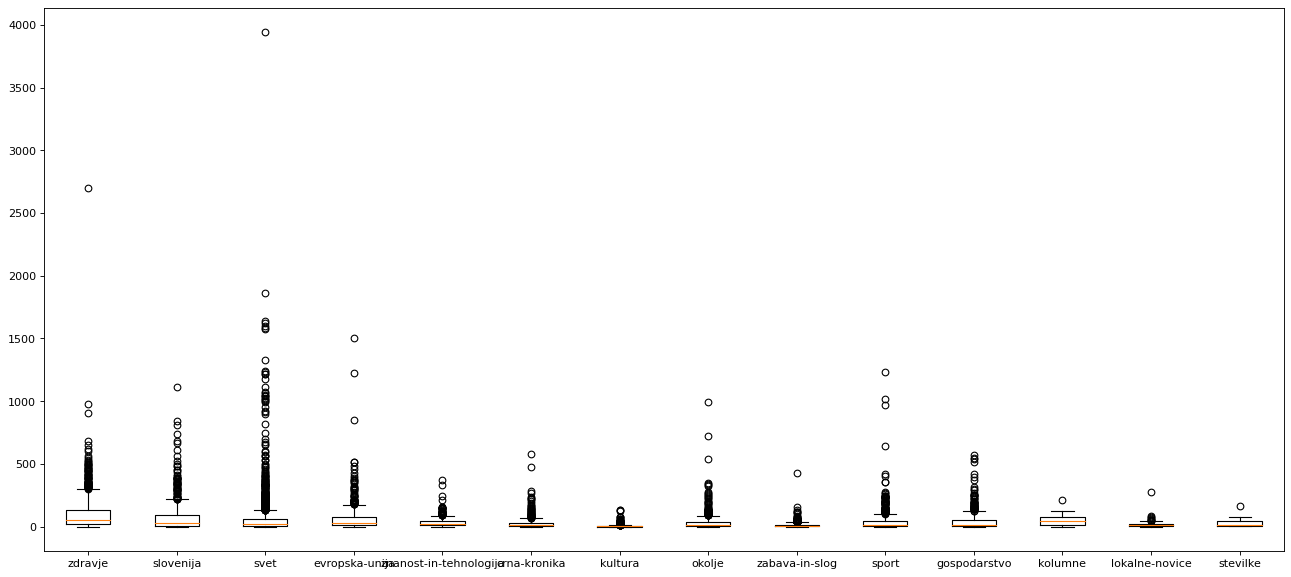

In [106]:
plt.figure(figsize=(20, 9), dpi=80, facecolor='white')
plt.boxplot(filtered_categories, labels=category_names)
plt.show()

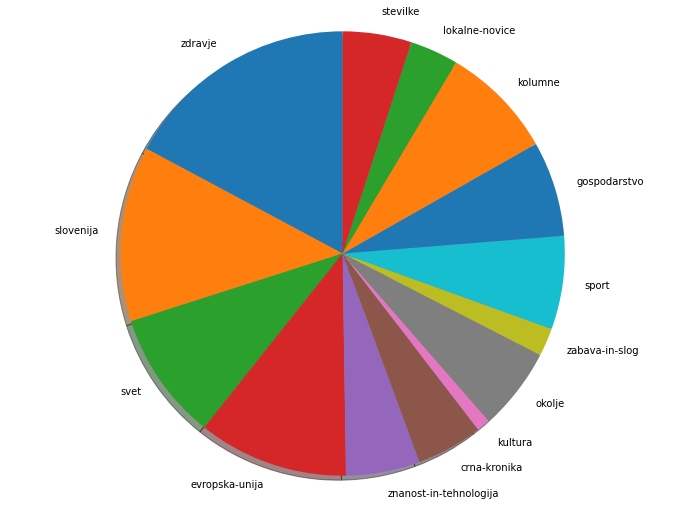

In [143]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = category_names
sizes = filtered_categories_avg
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(12, 9), facecolor="white")
ax1.pie(sizes, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [175]:
comments_rtvslo = []
comments_24ur = []
category_data = defaultdict(list)
category_data_24ur = defaultdict(list)
for idx, article in enumerate(data):
    if "total_comments" in article["24ur"].keys() and article["24ur"]["total_comments"] != -1:
        if article["24ur"]["similarity_score"] > 0.4:
            category_data[article["category"]].append(article["total_comments"])
            category_data_24ur[article["category"]].append(article["24ur"]["total_comments"])

In [176]:
category_names = []
filtered_categories_avg = []
for category in category_data:
    if len(category_data[category]) > 10:
        filtered_categories_avg.append(sum(category_data[category]) / len(category_data[category]))
        category_names.append(category)

In [177]:
filtered_categories_24ur_avg = []
category_names_24ur = []
for category in category_data_24ur:
    if len(category_data_24ur[category]) > 10:
        filtered_categories_24ur_avg.append(sum(category_data_24ur[category]) / len(category_data_24ur[category]))
        category_names_24ur.append(category)

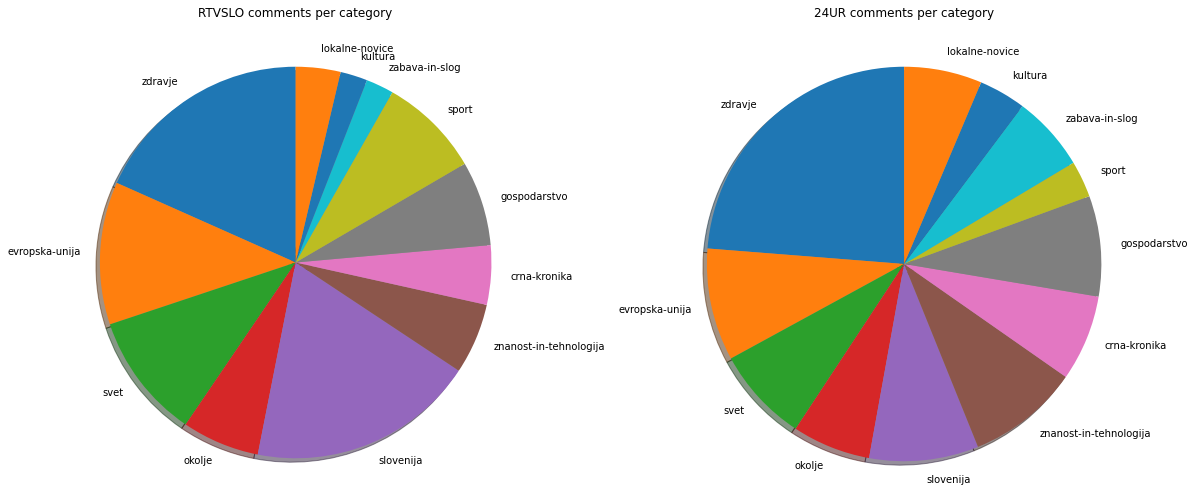

In [184]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = category_names
sizes = filtered_categories_avg
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), facecolor="white")
ax1.pie(sizes, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("RTVSLO comments per category", pad=30)

labels = category_names_24ur
sizes = filtered_categories_24ur_avg
ax2.pie(sizes, labels=labels, shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("24UR comments per category", pad=30)

plt.savefig("../img/pie_plots.png", bbox_inches='tight')
plt.show()